<h1>總整理

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
np.__version__,pd.__version__

('1.18.0', '0.25.3')

In [3]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)

##### 讀取資料

In [4]:
# 家
prev_data = pd.read_csv('previous_application.csv')
POS_data = pd.read_csv('POS_CASH_balance.csv')
# 學校
# prev_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application.csv')
# POS_data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\POS_CASH_balance.csv')


In [5]:
prev_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [6]:
POS_data

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


#### 定義函數

In [7]:
# 空值
def is_null(df):
    miss_value_percent = df.isnull().sum().sort_values(ascending=False)/len(df)
    miss_value_percent = (miss_value_percent * 100).round(decimals=2)

    miss_value_count = df.isnull().sum().sort_values(ascending=False)
    miss_value =pd.DataFrame( {'count':miss_value_count ,'precent': miss_value_percent} )

    print("空值共有 " + str(miss_value_count[miss_value_count>0].count()) + " 個欄位")
    print(miss_value[miss_value_count>0])
    
# 資料型態
def Type(df):
    return pd.DataFrame(df.dtypes).reset_index()

# 分類是空值與零的數
def check_na(df):
    
    data_float64 = list(df.columns[df.dtypes=="float64"])
    data_float64_count = len(data_float64)
    aa = pd.DataFrame()
    for name in data_float64:
        data_is_na = df[df[name].isnull()].count()[0]
        data_is_0 = df[df[name]==0].count()[0]
        pad = pd.DataFrame({"Na":data_is_na,"0":data_is_0},index=[name])
        aa = pd.concat([aa,pad],axis=0)
    return aa


# Prev時間異常值，另外新增欄位
issue_data = list(prev_data.columns[31:-1])
for name in issue_data:    
#     rename = name + "_ANOM"
#     data[rename] = data[name] == 365243
    prev_data[name].replace({365243: np.nan}, inplace = True)


# Prev將缺失值大於60的欄位去除
miss_value_percent = prev_data.isnull().sum().sort_values(ascending=False)/len(prev_data)
miss_value_percent = (miss_value_percent * 100).round(decimals=2)

if (miss_value_percent>60).any():
    delect_colomns = list(miss_value_percent[miss_value_percent>60].index)
    for n in delect_colomns:
        prev_data = prev_data.drop(columns=n)
        
# AMT_CREDIT空值只有一個直接補0
prev_data['AMT_CREDIT'].replace({np.nan: 0}, inplace = True)


In [8]:
is_null(prev_data)

空值共有 12 個欄位
                            count  precent
DAYS_TERMINATION           898978    53.82
RATE_DOWN_PAYMENT          895844    53.64
AMT_DOWN_PAYMENT           895844    53.64
DAYS_LAST_DUE              884286    52.94
NAME_TYPE_SUITE            820405    49.12
DAYS_LAST_DUE_1ST_VERSION  766929    45.92
DAYS_FIRST_DUE             713710    42.73
NFLAG_INSURED_ON_APPROVAL  673065    40.30
AMT_GOODS_PRICE            385515    23.08
AMT_ANNUITY                372235    22.29
CNT_PAYMENT                372230    22.29
PRODUCT_COMBINATION           346     0.02


In [9]:
is_null(POS_data)

空值共有 2 個欄位
                       count  precent
CNT_INSTALMENT_FUTURE  26087     0.26
CNT_INSTALMENT         26071     0.26


### 特徵工程
---
POS_data
  
   * 新增特徵欄位Delay_rate  --> 遲繳比例 (ex 若有四期 其有一期遲繳超過一天的話就是1/4)
   * 新增特徵欄位Contract_Change --> 提早繳完 且 不在目前進行中的貸款
   * 新增特徵欄位Total_Months --> 總還款期數
   

In [11]:
# POS_data
POS_data['Delay']=(POS_data['SK_DPD']>0).replace(True,1) # 該期貸款有愈期，1為有延遲，0為沒延遲


# 將有特殊狀態的欄位新增 (onehot)
categorical_columns = []
for name in POS_data:
    if POS_data[name].dtype=='object':
        categorical_columns.append(name)
POS_data = pd.get_dummies(POS_data, columns = categorical_columns)

POS_data.rename(columns={'NAME_CONTRACT_STATUS_Active':'Active',
                     'NAME_CONTRACT_STATUS_Amortized debt':'Amortized debt',
                    'NAME_CONTRACT_STATUS_Approved':'Approved',
                    'NAME_CONTRACT_STATUS_Canceled':'Canceled',
                    'NAME_CONTRACT_STATUS_Completed':'Completed',
                    'NAME_CONTRACT_STATUS_Demand':'Demand',
                    'NAME_CONTRACT_STATUS_Returned to the store':'Returned to the store',
                    'NAME_CONTRACT_STATUS_Signed':'Signed',
                    'NAME_CONTRACT_STATUS_XNA':'XNA'},inplace=True)

# 創造新的欄位 
num_aggregations = {
        'MONTHS_BALANCE':'count',
        'CNT_INSTALMENT' : 'max',
        'Delay':'mean',
        'SK_DPD':'max',
        'Active':'max',
        'Completed':'max',
        'Signed':'max',
        'Demand':'max',
        'Returned to the store':'max',
        'Approved':'max',
        'Amortized debt':'max',
        'Canceled':'max',
        'XNA':'max'
    }

POS_data_1 = POS_data.groupby(['SK_ID_CURR',
                                    'SK_ID_PREV']).agg({**num_aggregations})
# 做更名
POS_data_1.rename(columns={'MONTHS_BALANCE':'Total_Months',
                      'Delay':"Delay_Rate",
                      'SK_DPD':'Delay_day_max'},inplace=True)
# 重新排列
POS_data_1.reset_index(level=('SK_ID_CURR',
                          'SK_ID_PREV'),inplace=True)

POS_data_1['Contract_Change'] = ((POS_data_1['Total_Months'] < POS_data_1 ['CNT_INSTALMENT']) & (POS_data_1['Completed'] != 0)).replace(True,1)


# Total_Months --> 總還款期數 
# CNT_INSTALMENT --> 申請期數
# Delay_Rate --> 遲繳比例(ex 共四期 有一期遲繳就是1/4)
# Delay_day_max --> 改筆貸款愈期最大天數
# Contract_Change -- >提早繳完 且 不在目前進行中的貸款

In [12]:
POS_data_1.head(20)

,SK_ID_CURR,SK_ID_PREV,Total_Months,CNT_INSTALMENT,Delay_Rate,Delay_day_max,Active,Completed,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change
0,100001,1369693,5,4.0,0.000000,0,1,1,0,0,0,0,0,0,0,0.0
1,100001,1851984,4,4.0,0.250000,7,1,1,0,0,0,0,0,0,0,0.0
2,100002,1038818,19,24.0,0.000000,0,1,0,0,0,0,0,0,0,0,0.0
3,100003,1810518,8,12.0,0.000000,0,1,1,0,0,0,0,0,0,0,1.0
4,100003,2396755,12,12.0,0.000000,0,1,0,0,0,0,0,0,0,0,0.0
5,100003,2636178,8,6.0,0.000000,0,1,1,0,0,0,0,0,0,0,0.0
6,100004,1564014,4,4.0,0.000000,0,1,1,0,0,0,0,0,0,0,0.0
7,100005,2495675,11,12.0,0.000000,0,1,1,1,0,0,0,0,0,0,1.0
8,100006,2078043,3,48.0,0.000000,0,1,1,0,0,0,0,0,0,0,1.0
9,100006,2190416,10,12.0,0.000000,0,1,0,0,0,0,0,0,0,0,0.0


prev_data
  
   * 新增特徵欄位Early_ter --> 有繳過貸款但提前解約

In [13]:
# prev_data

# 提前解約(有問題?或是繳完了?)
prev_data['Early_ter'] = prev_data['DAYS_LAST_DUE_1ST_VERSION']>prev_data['DAYS_LAST_DUE'].replace(True,1) # 有繳過貸款但提前解約

# AMT_CREDIT(需還款總額度)/AMT_APPLICATION(實際得到的錢)
prev_data['CREDIT_APPLICATION_rate'] = prev_data['AMT_CREDIT'] / prev_data['AMT_APPLICATION']

# 還款率 --> AMT_ANNUITY(每期還款額度)/AMT_CREDIT(需還款總額度)
prev_data['PAYMENT_rate'] = prev_data['AMT_ANNUITY'] / prev_data['AMT_CREDIT']

<h1>將POS_CASH_balance.csv併到previous_application.csv

In [16]:
result = pd.merge(prev_data, POS_data_1,how='left', on='SK_ID_PREV')

In [17]:
result[result['SK_ID_PREV']==2044474]

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,Active,Completed,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change
1591891,2044474,257151,Consumer loans,8420.985,57960.0,52110.0,5850.0,57960.0,THURSDAY,10,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
pd.set_option("display.max_columns",None)
result.head(200)

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,Early_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,CNT_INSTALMENT,Delay_Rate,Delay_day_max,Active,Completed,Signed,Demand,Returned to the store,Approved,Amortized debt,Canceled,XNA,Contract_Change
0,2030495,271877,Consumer loans,1730.430,17145.00,17145.0,0.00,17145.00,SATURDAY,15,Y,1,0.000000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,-42.0,300.0,-42.0,-37.0,0.0,True,1.000000,0.100929,271877.0,2.0,12.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2802425,108129,Cash loans,25188.615,607500.00,679671.0,NaN,607500.00,THURSDAY,11,Y,1,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,-134.0,916.0,NaN,NaN,1.0,False,1.118800,0.037060,108129.0,5.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.00,136444.5,NaN,112500.00,TUESDAY,11,Y,1,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,-271.0,59.0,NaN,NaN,1.0,False,1.212840,0.110380,122040.0,10.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.00,470790.0,NaN,450000.00,MONDAY,7,Y,1,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,-482.0,-152.0,-182.0,-177.0,1.0,True,1.046200,0.099920,176158.0,12.0,12.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1784265,202054,Cash loans,31924.395,337500.00,404055.0,NaN,337500.00,THURSDAY,9,Y,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,False,1.197200,0.079010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2440540,357994,Cash loans,10267.155,225000.00,269550.0,NaN,225000.00,TUESDAY,12,Y,1,NaN,XNA,Refused,-228,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,x-sell,Regional / Local,774,Jewelry,36.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,False,1.198000,0.038090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1722543,437604,Consumer loans,5947.425,59481.00,53532.0,5949.00,59481.00,FRIDAY,11,Y,1,0.108926,XAP,Refused,-2806,XNA,SCO,NaN,Repeater,XNA,POS,XNA,Stone,179,Consumer electronics,10.0,low_normal,POS household without interest,NaN,NaN,NaN,NaN,NaN,False,0.899985,0.111100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1146853,333298,Consumer loans,4123.350,19782.00,18742.5,1980.00,19782.00,THURSDAY,16,Y,1,0.104061,XAP,Approved,-1189,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,20,Connectivity,6.0,high,POS mobile with interest,-1154.0,-1004.0,-1004.0,-997.0,0.0,False,0.947452,0.220000,333298.0,7.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,1855907,336955,Consumer loans,21023.055,73791.45,73791.0,0.45,73791.45,WEDNESDAY,16,Y,1,0.000007,XAP,Approved,-2719,Cash through the bank,XAP,Unaccompanied,New,Photo / Cinema Equipment,POS,XNA,Stone,68,Consumer electro

### 1.針對合約狀態做分析
*  把Canceled  、Unused offer全部的AMT_ANNUITY、AMT_DOWN_PAYMENT...視為零，因為沒實際還過錢

In [92]:
aaa = result[result['NAME_CONTRACT_STATUS']=='Canceled']

aaa[aaa['DAYS_FIRST_DUE'].notnull()].head()

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,ealay_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,Delay_Rate,Delay_Rate(High)


In [93]:
print(data['NAME_CONTRACT_STATUS'].value_counts())

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64


In [98]:
# Approved 有繳過貸款的
# Canceled 客戶自行取消
# Refused 被拒絕
# Unused offer 客戶自行取消，不同處理階段

pd.set_option("display.max_columns",None)
result[result['NAME_CONTRACT_STATUS']=='Unused offer'].head(100)

,SK_ID_PREV,SK_ID_CURR_x,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,ealay_ter,CREDIT_APPLICATION_rate,PAYMENT_rate,SK_ID_CURR_y,Total_Months,Delay_Rate,Delay_Rate(High)
41,1366380,247572,Consumer loans,NaN,17950.500,17950.500,0.0,17950.500,MONDAY,19,Y,1,0.0,XAP,Unused offer,-1141,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
97,1935914,191576,Consumer loans,NaN,23400.000,23400.000,NaN,23400.000,SATURDAY,9,Y,1,NaN,XAP,Unused offer,-1412,Cash through the bank,CLIENT,Family,Repeater,Audio/Video,XNA,XNA,Country-wide,3500,Consumer electronics,NaN,XNA,POS household with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
98,1457539,307992,Consumer loans,NaN,113215.500,113215.500,0.0,113215.500,SUNDAY,12,Y,1,0.0,XAP,Unused offer,-520,Cash through the bank,CLIENT,NaN,New,Computers,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
152,1763186,393157,Consumer loans,NaN,62860.500,62860.500,0.0,62860.500,FRIDAY,15,Y,1,0.0,XAP,Unused offer,-518,Cash through the bank,CLIENT,NaN,Repeater,Computers,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
182,2284847,454600,Consumer loans,NaN,27666.000,27666.000,0.0,27666.000,THURSDAY,16,Y,1,0.0,XAP,Unused offer,-357,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,30,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
325,2543602,381168,Consumer loans,NaN,34035.750,34035.750,0.0,34035.750,SATURDAY,13,Y,1,0.0,XAP,Unused offer,-777,Cash through the bank,CLIENT,NaN,Refreshed,Mobile,XNA,XNA,Country-wide,45,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
348,1541874,157041,Consumer loans,NaN,51246.000,51246.000,0.0,51246.000,SUNDAY,11,Y,1,0.0,XAP,Unused offer,-288,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,40,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
404,1472909,452034,Consumer loans,NaN,30145.500,30145.500,0.0,30145.500,SUNDAY,13,Y,1,0.0,XAP,Unused offer,-96,Cash through the bank,CLIENT,NaN,Repeater,Computers,XNA,XNA,Country-wide,90,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
413,1610260,195654,Consumer loans,NaN,52465.500,52465.500,0.0,52465.500,SUNDAY,15,Y,1,0.0,XAP,Unused offer,-884,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,16,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN
466,2419550,139331,Consumer loans,NaN,73935.000,73935.000,0.0,73935.000,SATURDAY,15,Y,1,0.0,XAP,Unused offer,-468,Cash through the bank,CLIENT,NaN,New,Homewares,XNA,XNA,Country-wide,50,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN,NaN,NaN,NaN


In [95]:
# NAME_CONTRACT_STATUS只有Approved的有繳過貸款，其他通通沒有

CONTRACT_STATUS_Approved = (result[result['NAME_CONTRACT_STATUS']=='Approved']['Delay_Rate'].notnull()==True).unique()
CONTRACT_STATUS_Canceled = (result[result['NAME_CONTRACT_STATUS']=='Canceled']['Delay_Rate'].notnull()==True).unique()
CONTRACT_STATUS_Refused = (result[result['NAME_CONTRACT_STATUS']=='Refused']['Delay_Rate'].notnull()==True).unique()
CONTRACT_STATUS_Unused_offer = (result[result['NAME_CONTRACT_STATUS']=='Unused offer']['Delay_Rate'].notnull()==True).unique()

print(f'合約為Approved : {CONTRACT_STATUS_Approved}')
print(f'合約為Canceled : {CONTRACT_STATUS_Canceled}')
print(f'合約為Refused : {CONTRACT_STATUS_Refused}')
print(f'合約為Unused offer : {CONTRACT_STATUS_Unused_offer}')

合約為Approved : [ True False]
合約為Canceled : [False]
合約為Refused : [False]
合約為Unused offer : [False]


Text(0.5, 1, 'Correlation between features')

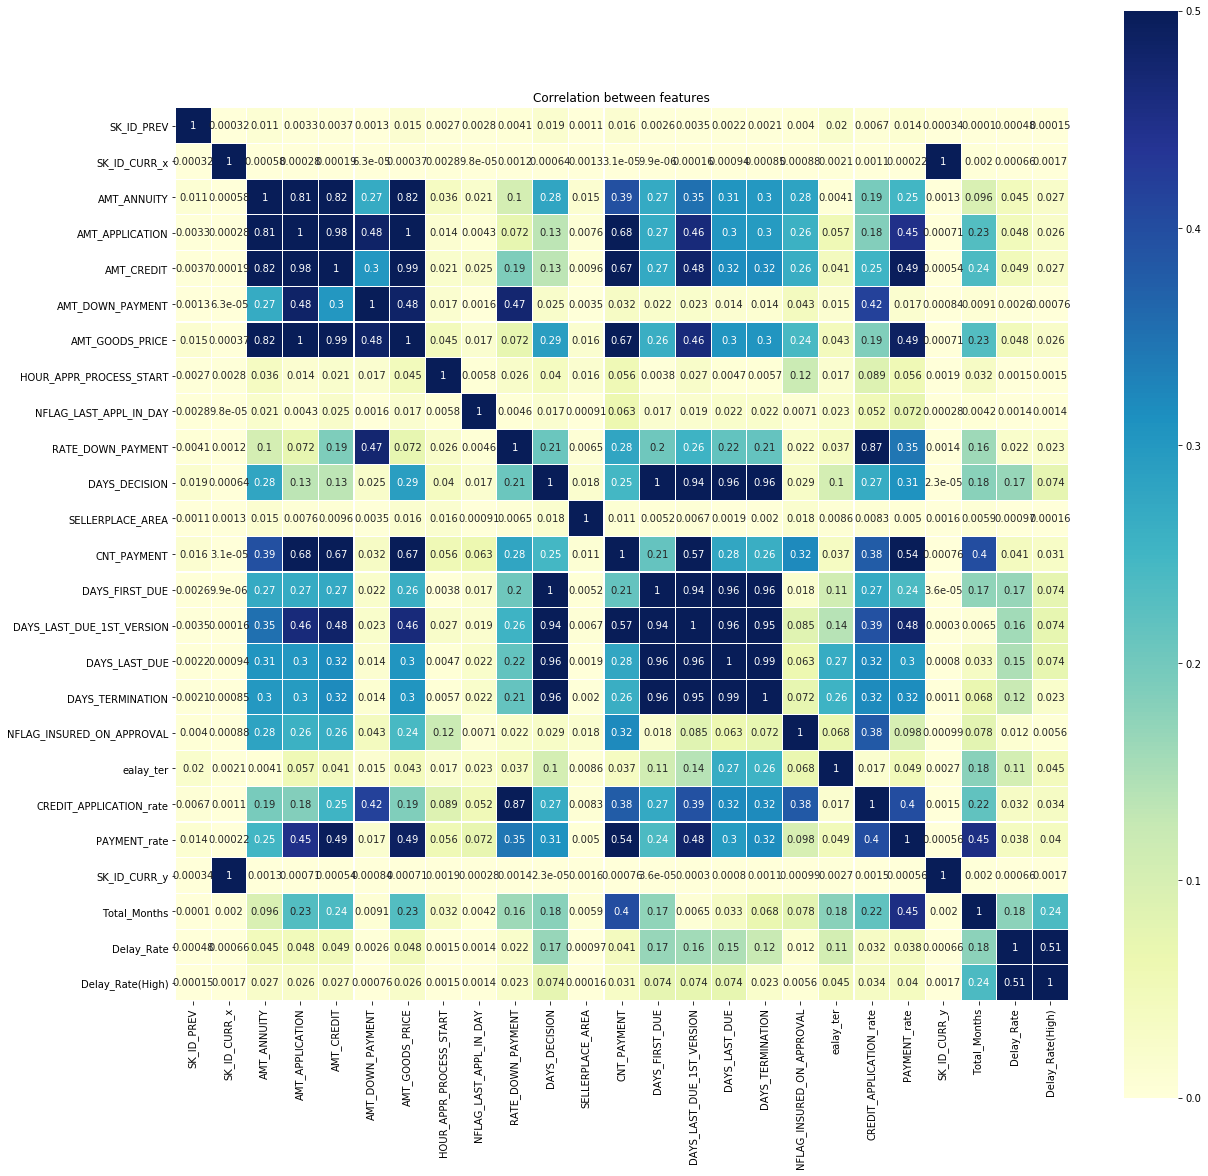

In [96]:
ext_data = result
correlations = ext_data.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')